### Libraries and data load

In [57]:
# library import
import pandas as pd
import numpy as np
import math as m

import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# loading data
df_freq = pd.read_csv("cleaned_data.csv")
df_freq

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Area,VehBrand,VehGas,Region,ClaimFrequency
0,1.0,0.10000,5.0,0.0,55.0,50.0,1217.0,D,B12,Regular,R82,1.000000
1,1.0,0.77000,5.0,0.0,55.0,50.0,1217.0,D,B12,Regular,R82,1.298701
2,1.0,0.75000,6.0,2.0,52.0,50.0,54.0,B,B12,Diesel,R22,1.333333
3,1.0,0.84000,7.0,0.0,46.0,50.0,76.0,B,B12,Diesel,R72,1.190476
4,1.0,0.52000,6.0,2.0,38.0,50.0,3003.0,E,B12,Regular,R31,1.923077
...,...,...,...,...,...,...,...,...,...,...,...,...
677997,0.0,0.00274,4.0,0.0,54.0,50.0,3317.0,E,B12,Regular,R93,0.000000
677998,0.0,0.00274,4.0,0.0,41.0,95.0,9850.0,E,B12,Regular,R11,0.000000
677999,0.0,0.00274,6.0,2.0,45.0,50.0,1323.0,D,B12,Diesel,R82,0.000000
678000,0.0,0.00274,4.0,0.0,60.0,50.0,95.0,B,B12,Regular,R26,0.000000


### Exploratory data analysis

In [59]:
# quick look on data description
df_freq.describe()

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimFrequency
count,678002.000000,678002.000000,678002.000000,678002.000000,678002.000000,678002.000000,678002.000000,678002.000000
mean,0.053189,0.528748,6.454637,6.956276,45.442614,59.761574,1792.442657,0.076323
std,0.238196,0.364441,2.050914,5.398480,14.037434,15.636724,3958.673690,0.383057
min,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000
25%,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000
50%,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000
75%,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000
max,5.000000,2.010000,15.000000,25.000000,87.000000,230.000000,27000.000000,15.151515


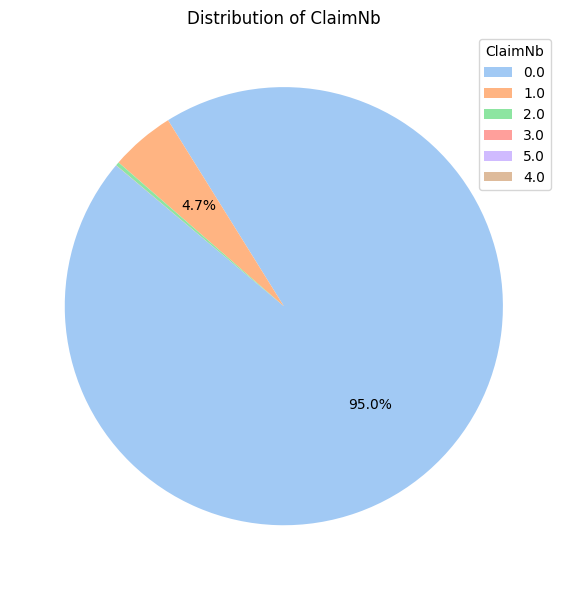

In [60]:
# Distribution of claim numbers
sns.set_palette("pastel")
freq_counts = df_freq["ClaimNb"].value_counts()
plt.figure(figsize=(6, 6))

wedges, _, autotexts = plt.pie(
    freq_counts, labels=None, 
    autopct=lambda x: f"{x:.1f}%" if x >= 4.7 else "", 
    startangle=140
)

plt.title("Distribution of ClaimNb")
plt.legend(wedges, freq_counts.index, title="ClaimNb", loc="upper right")

plt.tight_layout()
plt.show()

As we can see only aproximattely 5% of observation, had value of claim number other than 0. This is an importan fature of dataset that needs to be adresed during model training.

Only approximately 5% of observations have at least one claim. This class imbalance introduces several challenges, including biased models, difficulties in model selection, and the need for resampling techniques. Additionally, standard evaluation metrics like accuracy become misleading, making it necessary to use alternative metrics such as precision, recall, and F1-score. Furthermore, this imbalance will bias exploratory data analysis, so in certain cases, I will restrict the data range to include only observations with a claim frequency greater than zero.

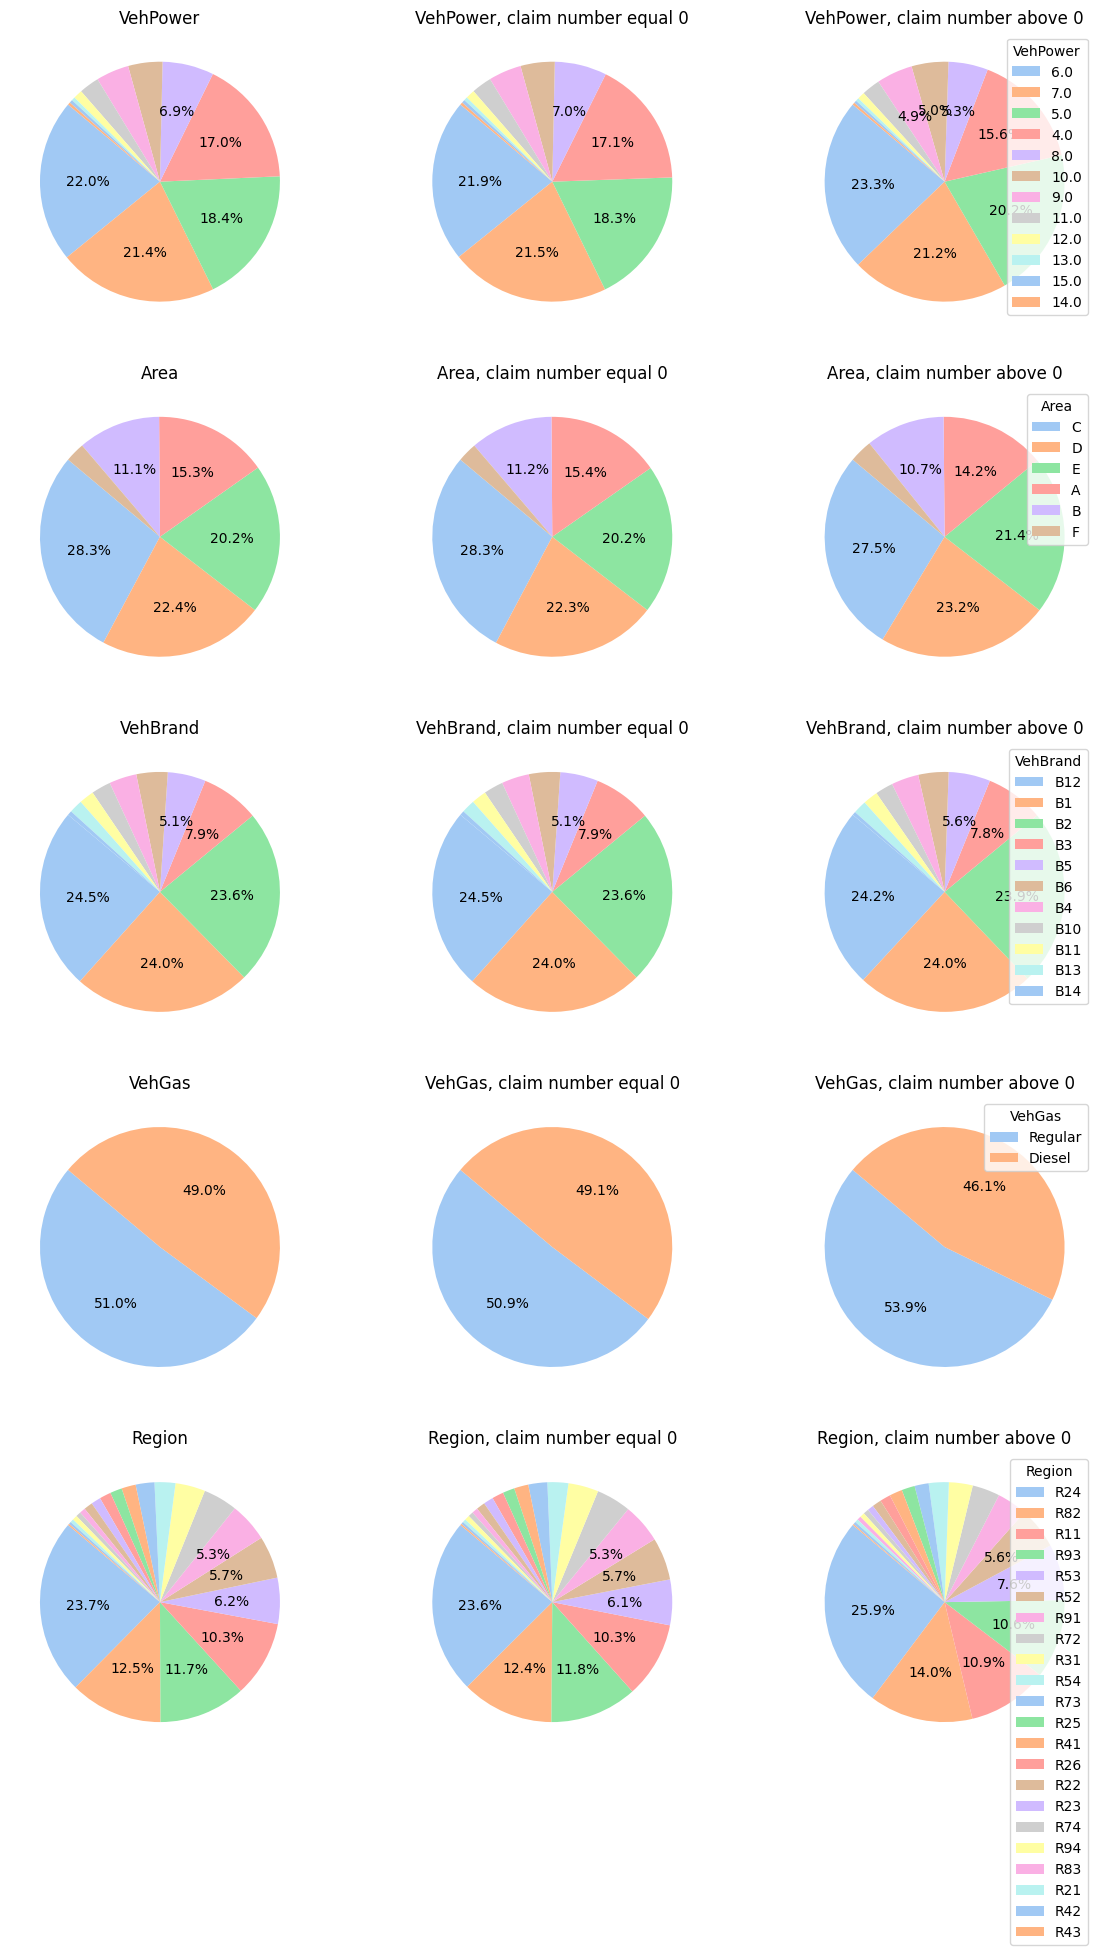

In [61]:
# comparying categorical variables distribution
pie_chart_vars = ["VehPower", "Area", "VehBrand", "VehGas", "Region"]
n_cols = 3
n_rows = len(pie_chart_vars)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
sns.set_palette("pastel")

for i, var in enumerate(pie_chart_vars):
    # Get unique category labels
    all_categories = df_freq[var].value_counts().index  # Sorted automatically by frequency

    # Assign consistent colors
    color_palette = sns.color_palette("pastel", len(all_categories))
    color_mapping = {cat: color for cat, color in zip(all_categories, color_palette)}

    # All data distribution
    freq_counts_all = df_freq[var].value_counts()
    sorted_categories_all = freq_counts_all.index  # Ensure sorting is consistent
    colors_all = [color_mapping[cat] for cat in sorted_categories_all]

    wedges, _, autotexts = axes[i, 0].pie(
        freq_counts_all, labels=None, 
        autopct=lambda x: f"{x:.1f}%" if x >= 4.7 else "", startangle=140, colors=colors_all
    )
    axes[i, 0].set_title(f"{var}")
    # axes[i, 0].legend(wedges, sorted_categories_all, title=var, loc="upper right")

    # Data distribution where ClaimNb = 0
    freq_counts_claim = df_freq[df_freq["ClaimNb"] == 0][var].value_counts()
    sorted_categories_claim = freq_counts_claim.index
    colors_claim = [color_mapping.get(cat, "gray") for cat in sorted_categories_claim]

    wedges, _, autotexts = axes[i, 1].pie(
        freq_counts_claim, labels=None, 
        autopct=lambda x: f"{x:.1f}%" if x >= 4.7 else "", startangle=140, colors=colors_claim
    )
    axes[i, 1].set_title(f"{var}, claim number equal 0")
    # axes[i, 1].legend(wedges, sorted_categories_claim, title=var, loc="upper right")

    # Data distribution where ClaimNb > 0
    freq_counts_claim = df_freq[df_freq["ClaimNb"] > 0][var].value_counts()
    sorted_categories_claim = freq_counts_claim.index
    colors_claim = [color_mapping.get(cat, "gray") for cat in sorted_categories_claim]

    wedges, _, autotexts = axes[i, 2].pie(
        freq_counts_claim, labels=None, 
        autopct=lambda x: f"{x:.1f}%" if x >= 4.7 else "", startangle=140, colors=colors_claim
    )
    axes[i, 2].set_title(f"{var}, claim number above 0")
    axes[i, 2].legend(wedges, sorted_categories_claim, title=var, loc="upper right")

# Remove any unused subplots
for j in range(i + 1, n_rows):
    for k in range(n_cols):
        fig.delaxes(axes[j, k])

plt.tight_layout()
plt.show()

The analysis suggests that VehPower shows a slight shift, with lower-power vehicles being underrepresented in claim cases. Area distributions are mostly stable, though Area "A" has a slightly higher claim rate. VehBrand remains consistent across groups, indicating no strong correlation with claims. VehGas reveals that diesel vehicles have a slightly lower claim frequency, possibly due to different driving behaviors. Region shows minor variations, with certain areas (e.g., R24, R91) having slightly higher claim rates.

There are some small differences in the distribution of the categorical variable within each considered category, particularly in the "Region" variable.

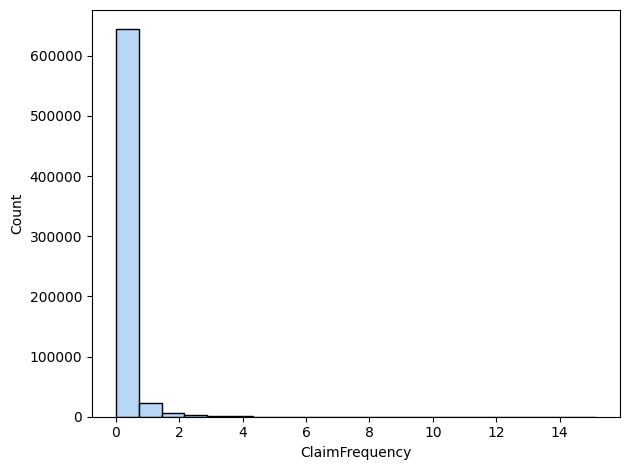

In [62]:
# explorying claim frequency distribution
sns.histplot(data=df_freq, x="ClaimFrequency")
plt.tight_layout()
plt.show()

In [63]:
print("Variance of claim frequency: ", np.var(df_freq["ClaimFrequency"]))
print("Mean of claim frequency: ", np.mean(df_freq["ClaimFrequency"]))

Variance of claim frequency:  0.14673276952835107
Mean of claim frequency:  0.07632303008365851


The claim frequency distribution is highly right-skewed, with a variance nearly double the mean. This overdispersion suggests that a Poisson distribution might not be sufficient, and a negative binomial distribution could be a better fit. I will test both shortly to determine the most appropriate modeling approach.

In [64]:
# function declaration for correlation matrix
def display_correlation_matrix(data: pd.DataFrame, figsize=(12,8)):
   '''
   visualizes the correlation matrix of numeric variables in a given DataFrame.

   data (pd.DataFrame): The input DataFrame containing the data.
   figsize (tuple, default=figsize): The size of the figure for the heatmap.
   '''
   cor_matrix = data.select_dtypes(include=[np.number]).corr()
   f, ax = plt.subplots(figsize=figsize)
   cmap = sns.diverging_palette(230, 20, as_cmap=True)

   sns.heatmap(cor_matrix, cmap=cmap, vmax=.3, center=0,
               square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

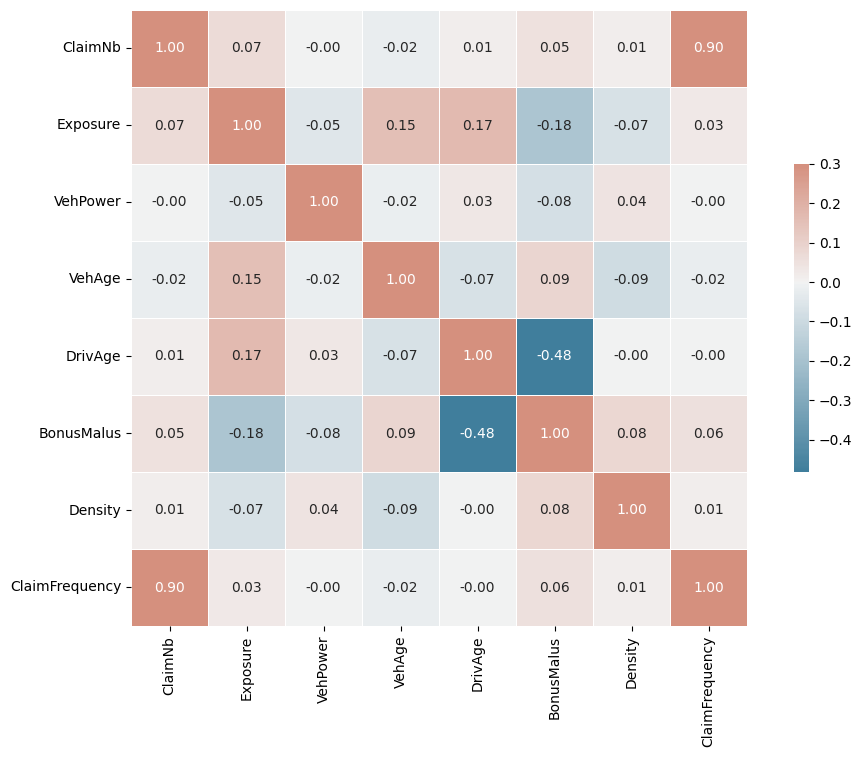

In [65]:
display_correlation_matrix(df_freq)

Claim frequency calculated as claim number divided by exposure period, obviously shows high linear correlation with claim number, a little unexpected is that corelation with exposure period is close to zero. Other features show weak correlations with claim frequency, indicating that no single variable strongly influences it. BonusMalus has a moderate negative correlation with DrivAge (-0.48), suggesting that younger drivers tend to have higher risk scores. Exposure has a mild positive correlation with DrivAge and VehAge, but overall, the relationships are weak.

This suggests that predicting claim frequency will likely require more complex modeling techniques beyond simple linear relationships.

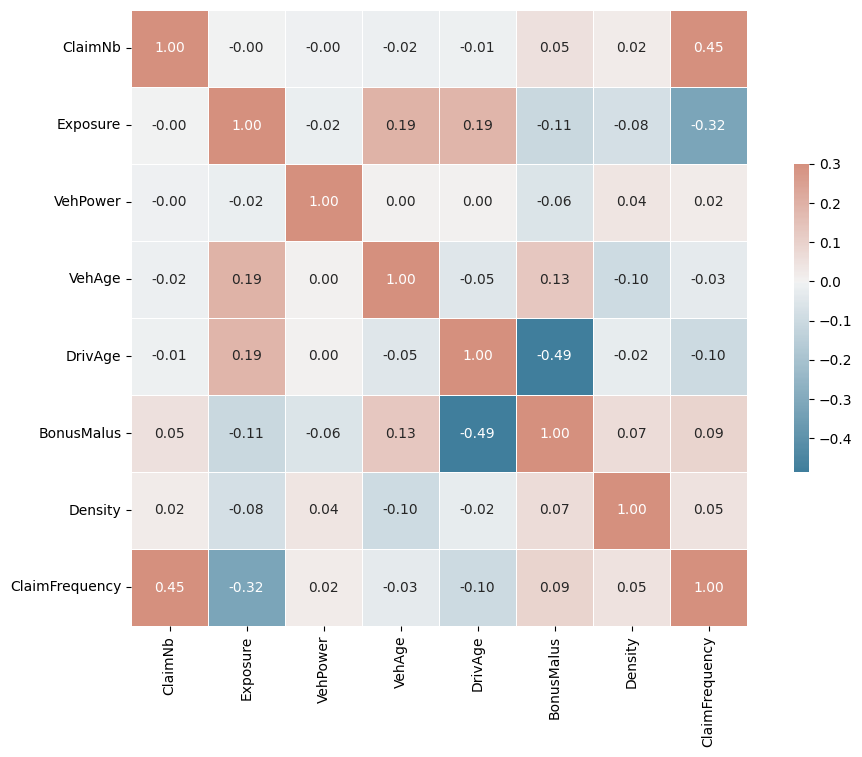

In [66]:
# correlation matrix for claim frequency above 0
df_freq_positive = df_freq[df_freq["ClaimFrequency"] > 0]
display_correlation_matrix(df_freq_positive)

Limiting data to only those with claim frequency above 0 doesn't have much impact. The correlation structure remains largely weak, reaffirming that no single variable has a strong linear impact on claim frequency. Compared to the full dataset, some differences emerge. The correlation between claim frequency and exposure is moderately negative, whereas it was close to zero before. The negative correlation between DrivAge and BonusMalus persists. A sligtly higher correlation is present between claim frequency and other features, but they are still weak.

In [67]:
# function declaration for scatter plots
def display_scatterplots(y: str, variables: list, data=df_freq, figsize=(12,8)):
    '''
    generates scatterplots for visualizing the relationship between a target variable and a list of independent variables.

    y (str): The target variable to be plotted on the y-axis.
    variables (list): A list of variables to be plotted against the target variable (y).
    data (pd.DataFrame, default=df_freq): The DataFrame containing the data.
    figsize (tuple, default=(12,8)): The size of the figure.
    '''
    n_cols = 3
    n_rows = m.ceil((len(variables) + 1) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, var in enumerate(variables):
        sns.scatterplot(data=data, x=var, y=y, ax=axes[i], alpha=0.4)
        axes[i].set_title(f'{y} vs {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(y)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

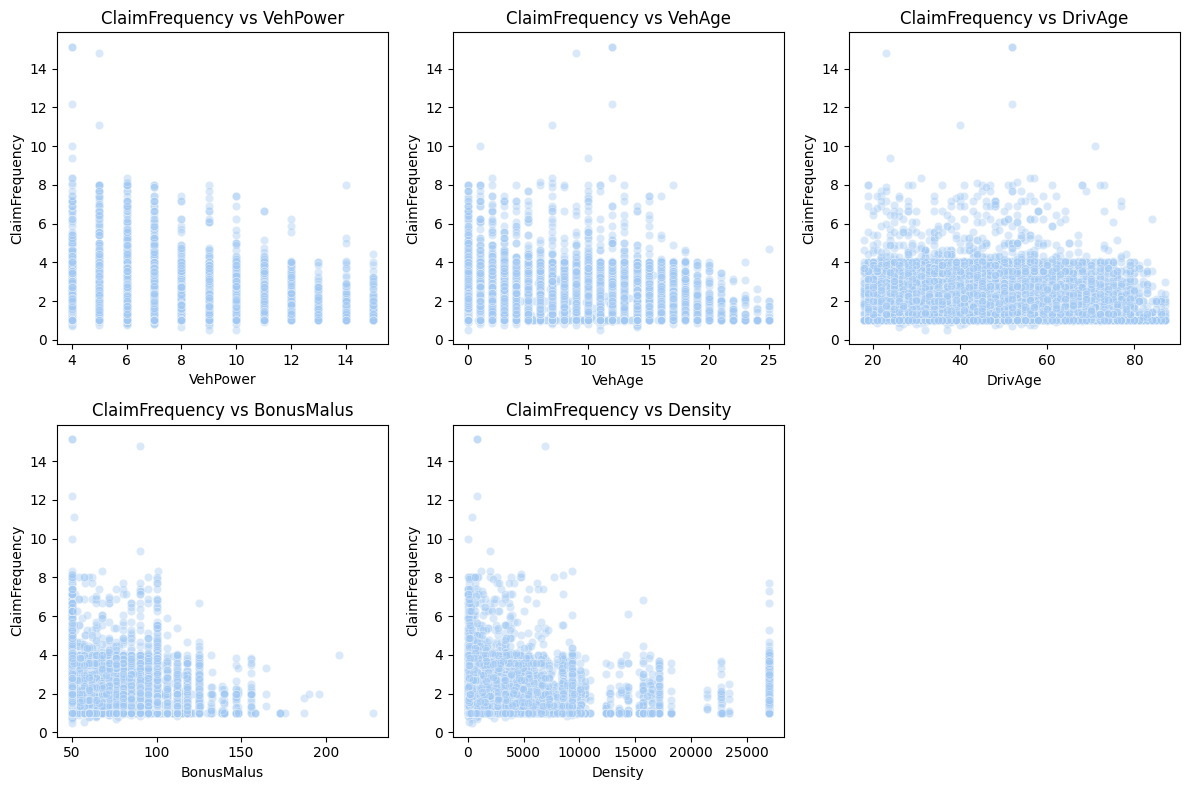

In [68]:
display_scatterplots(data=df_freq_positive, y="ClaimFrequency", variables=["VehPower", "VehAge", "DrivAge", "BonusMalus", "Density"])

For ClaimFrequency, a wider range of values is observed, especially in VehPower, VehAge, and DrivAge. While there is some spread, ClaimFrequency tends to be denser at lower values. In BonusMalus and Density, a noticeable concentration of lower-frequency claims appears at lower levels, but some higher values are also scattered. This indicates that while a few policyholders have high claim frequencies, they remain an exception.

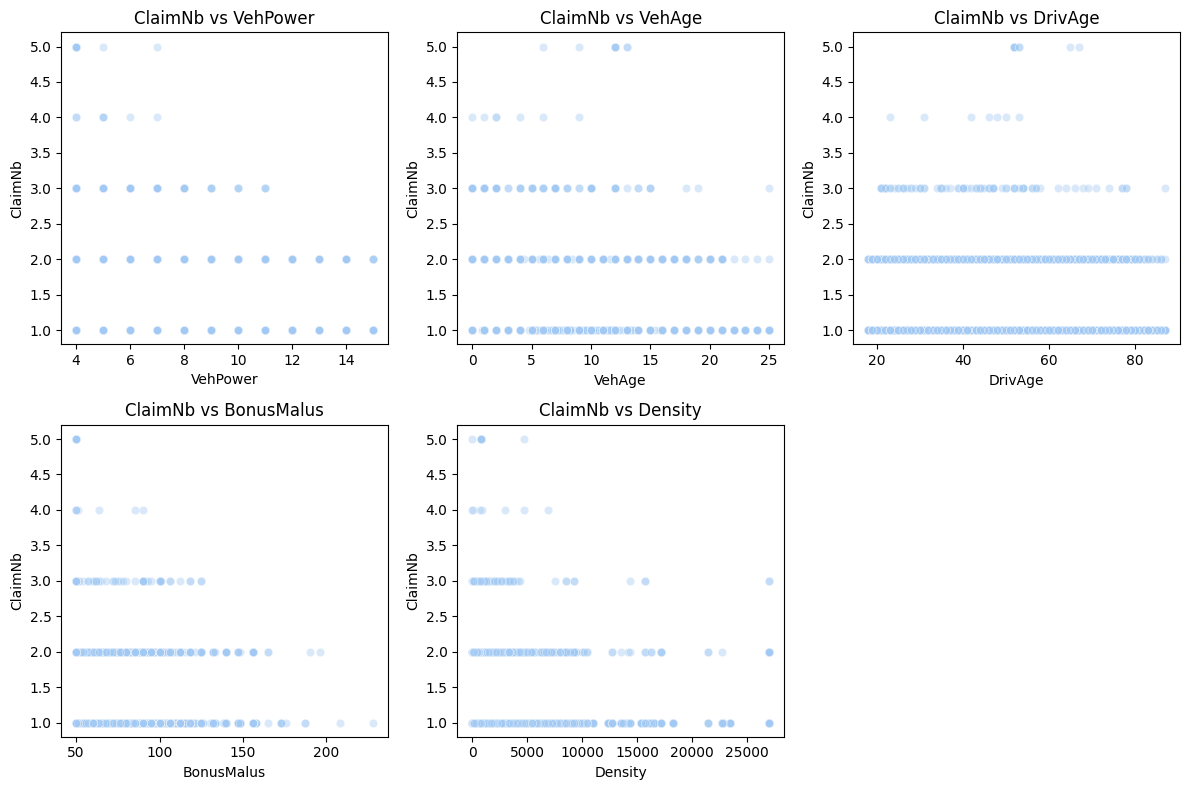

In [69]:
display_scatterplots(data=df_freq_positive ,y="ClaimNb", variables=["VehPower", "VehAge", "DrivAge", "BonusMalus", "Density"])

For number of claims, most claims are concentrated at the lower values, suggesting that the majority of policyholders file only one claim. The scatter plots show that ClaimNb remains fairly stable across VehPower, VehAge, and DrivAge, without a strong visible trend, which aligns with the weak correlations seen in the matrix. There is some dispersion at higher values, but the density is much lower. BonusMalus and Density exhibit more dispersion, but claims are still concentrated at the lowest levels.

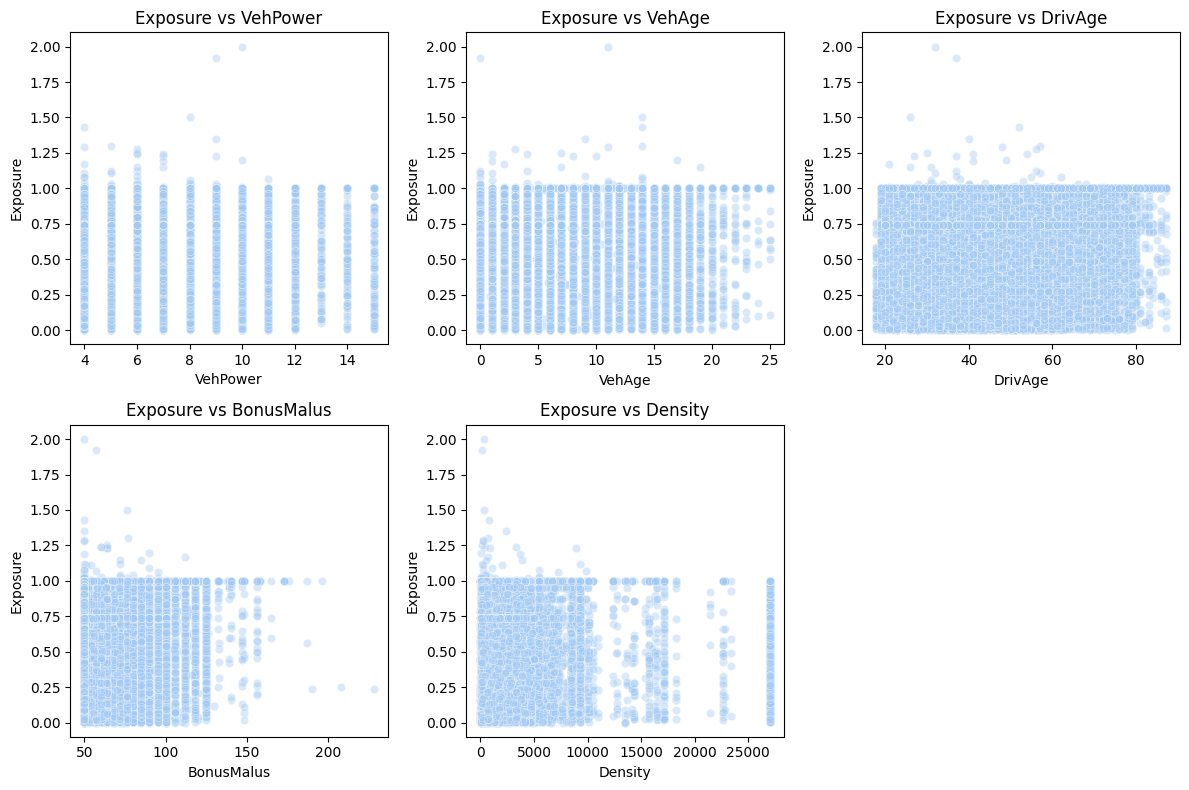

In [70]:
display_scatterplots(data=df_freq_positive, y="Exposure", variables=["VehPower", "VehAge", "DrivAge", "BonusMalus", "Density"])

For exposure period values mainly concentrate between values of 0 and 1 with few exceptions, dosn't showing any strong patterns

Overall, the scatter plots support the correlation matrix's findings. There are no strong linear relationships, but some weak trends and concentration patterns emerge. The results suggest that factors like age, vehicle power, and density have a limited but noticeable impact on claim behavior.

In [71]:
# function declaration for stripplots
def display_stripplots(y: str, variables: list, data=df_freq, figsize=(12,8)):
    n_cols = 3
    n_rows = m.ceil((len(variables) + 1) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, var in enumerate(variables):
        sns.stripplot(data=data, x=var, y=y, ax=axes[i], zorder=2)
        axes[i].set_title(f'{y} vs {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(y)

        category_means = data.groupby(var)[y].mean()
        xticks = {cat: idx for idx, cat in enumerate(data[var].unique())}  # Map categories to positions
        
        for cat, mean_val in category_means.items():
            if cat in xticks:
                axes[i].plot([xticks[cat] - 0.2, xticks[cat] + 0.2], [mean_val, mean_val], 
                             color='red', linewidth=1.5, alpha=0.9, zorder=3)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

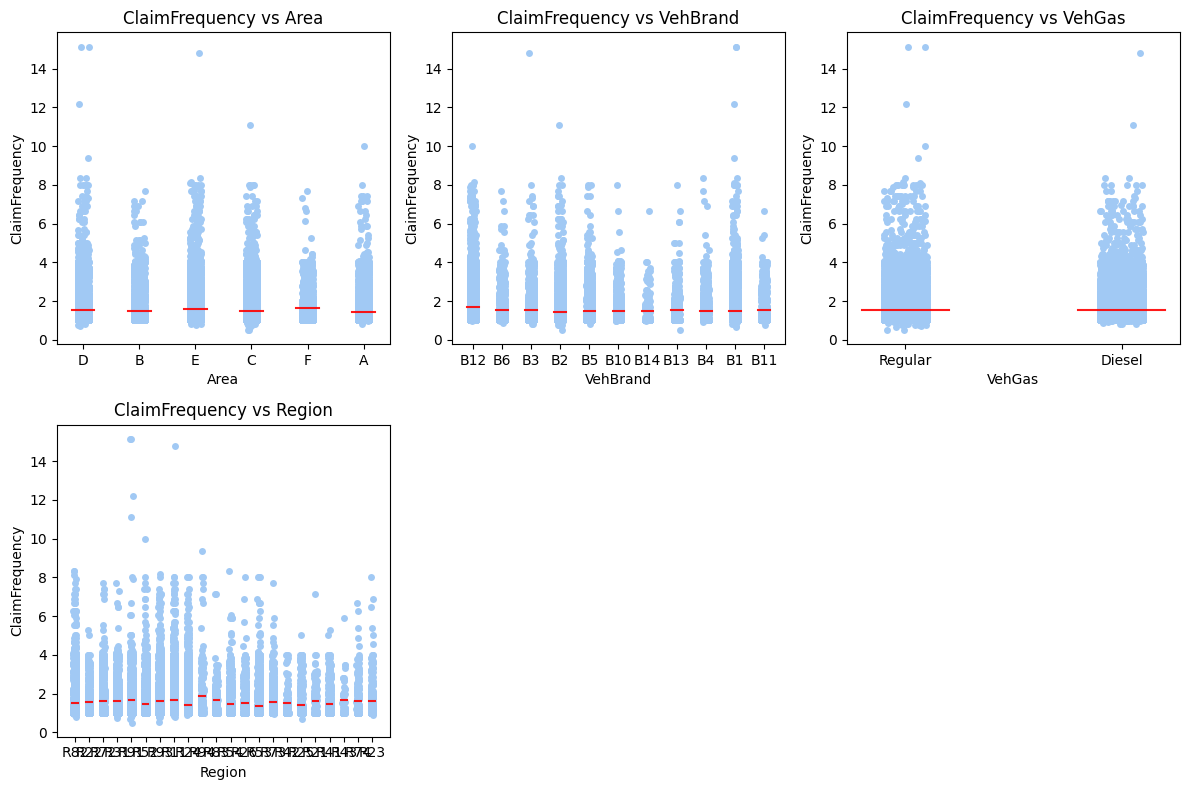

In [72]:
display_stripplots(data=df_freq_positive, y="ClaimFrequency", variables=["Area", "VehBrand", "VehGas", "Region"])

The distribution of claim frequency across categorical values appears to vary between categories, primarily due to differences in the number of observations within each group. However, the average claim frequency remains relatively consistent across most categories, with the exception of the "region" feature, which shows a noticeable difference in distribution. Based on this, we can conclude that "region" may be one of the most useful features for model building.

In [73]:
df_freq.groupby("Region")['ClaimFrequency'].mean().sort_values()

Region
R23    0.052291
R83    0.057551
R73    0.059263
R91    0.064593
R41    0.065014
R72    0.065079
R31    0.065259
R43    0.067986
R26    0.069572
R54    0.071450
R52    0.072481
R93    0.074757
R24    0.077348
R21    0.078265
R25    0.078614
R22    0.083471
R42    0.084153
R53    0.084371
R82    0.085078
R74    0.085936
R11    0.087885
R94    0.091826
Name: ClaimFrequency, dtype: float64

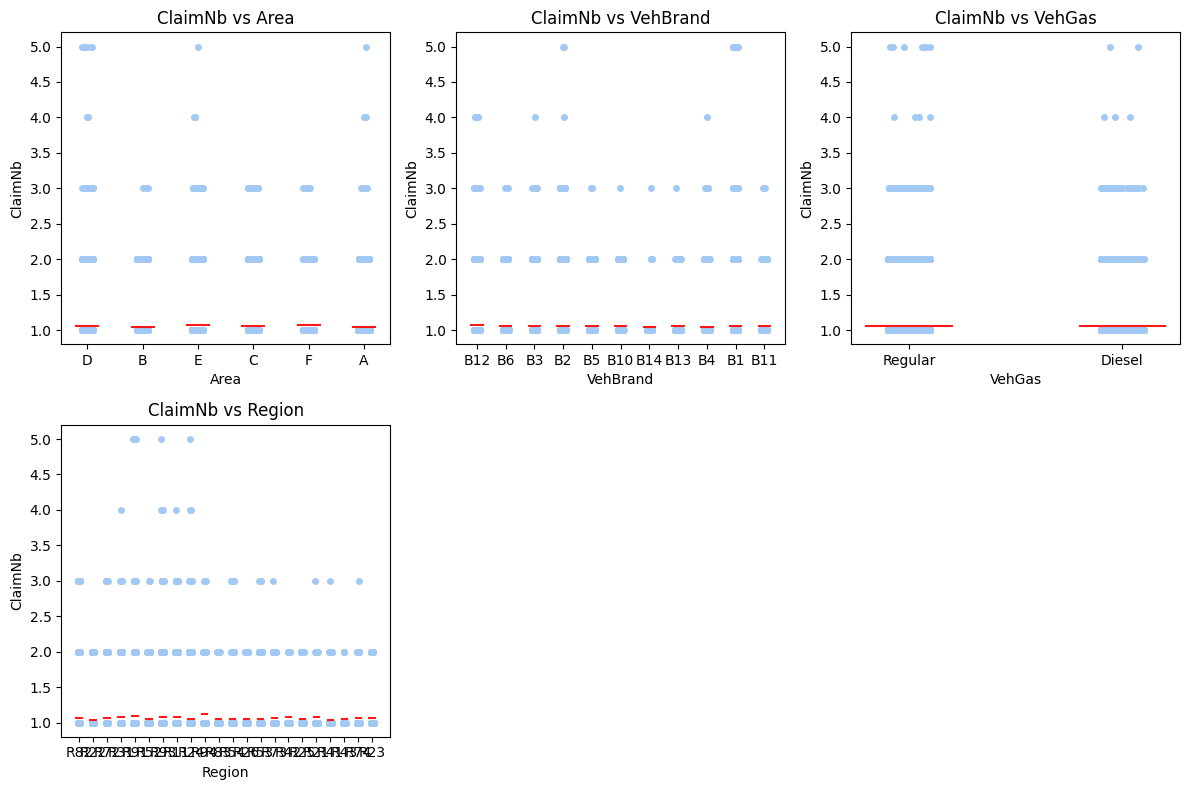

In [74]:
display_stripplots(data=df_freq_positive, y="ClaimNb", variables=["Area", "VehBrand", "VehGas", "Region"])

Conclusions we can draw out of stripp plots of claim number are very similar to those showing claim frequency. Again "region" feature shows a noticeable difference in distribution, what is expected taking into consideration high corelation between claim number and claim frequency.

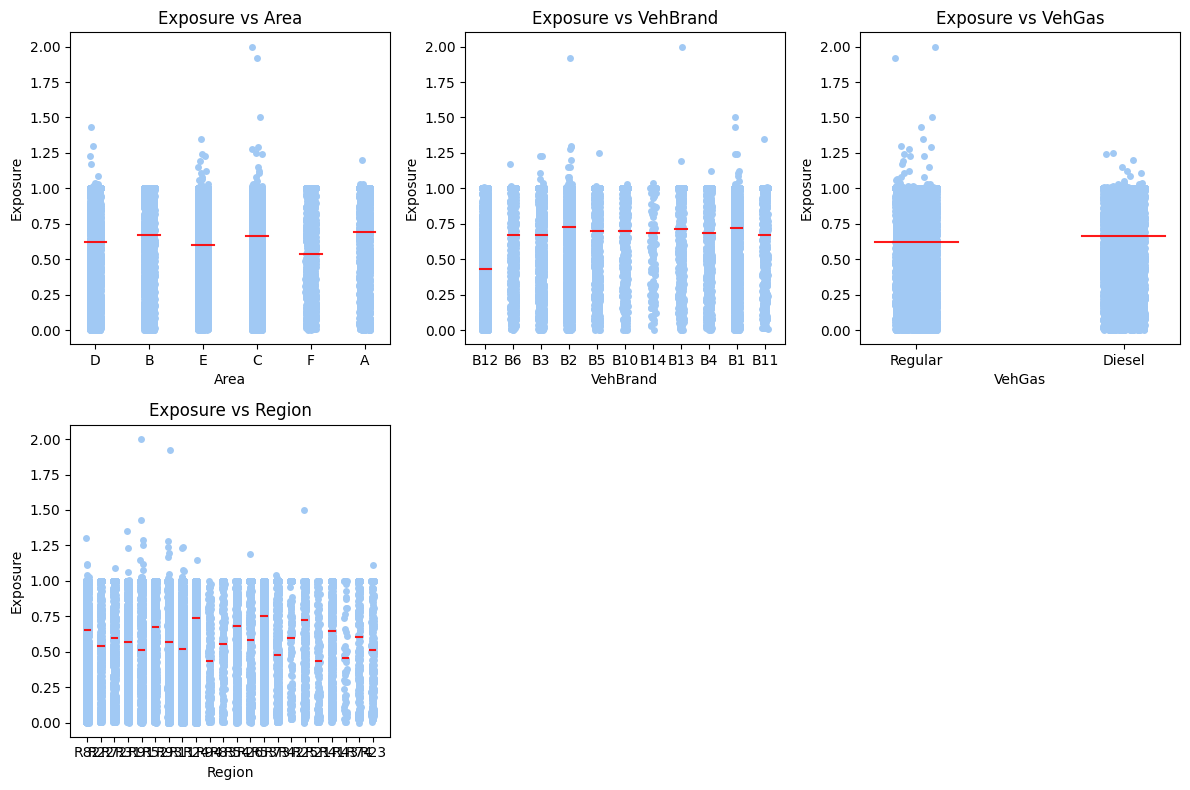

In [75]:
display_stripplots(data=df_freq_positive, y="Exposure", variables=["Area", "VehBrand", "VehGas", "Region"])

The dispersion of the exposure period is much more stable across classes. However, the average values show greater variation compared to claim number and claim frequency, not only in the "region" feature but also in others. On the other hand, the exposure period is a unique feature, as a claim during a shorter exposure period does not necessarily indicate a higher claim number over the entire policy duration. Additionally, differences in exposure periods may be influenced by the specifics of the French insurance market. A more in-depth analysis of this feature would require expert consultation to fully understand its implications.

In [76]:
top_10 = df_freq.nlargest(n=10, columns=["ClaimFrequency"])
top_10

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Area,VehBrand,VehGas,Region,ClaimFrequency
304474,5.0,0.33,4.0,12.0,52.0,50.0,824.0,D,B1,Regular,R91,15.151515
321238,5.0,0.33,4.0,12.0,52.0,50.0,824.0,D,B1,Regular,R91,15.151515
364427,4.0,0.27,5.0,9.0,23.0,90.0,6924.0,E,B3,Diesel,R11,14.814815
320754,5.0,0.41,4.0,12.0,52.0,50.0,824.0,D,B1,Regular,R91,12.195122
342114,3.0,0.27,5.0,7.0,40.0,51.0,403.0,C,B2,Diesel,R91,11.111111
522546,3.0,0.30,4.0,1.0,71.0,50.0,42.0,A,B12,Regular,R52,10.000000
214596,3.0,0.32,4.0,10.0,24.0,90.0,1955.0,D,B1,Regular,R94,9.375000
203389,3.0,0.36,4.0,2.0,57.0,50.0,1217.0,D,B4,Regular,R82,8.333333
424350,3.0,0.36,6.0,12.0,56.0,101.0,9307.0,E,B1,Diesel,R82,8.333333
461804,3.0,0.36,4.0,7.0,31.0,68.0,1974.0,D,B2,Diesel,R54,8.333333


In [77]:
bottom_10 = df_freq.nsmallest(n=10, columns=["ClaimFrequency"])
bottom_10

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Area,VehBrand,VehGas,Region,ClaimFrequency
9385,0.0,0.005464,6.0,15.0,50.0,50.0,29.0,A,B2,Diesel,R24,0.0
9386,0.0,0.670000,6.0,15.0,50.0,50.0,29.0,A,B2,Diesel,R24,0.0
9387,0.0,0.890000,6.0,8.0,30.0,68.0,48.0,A,B1,Diesel,R53,0.0
9388,0.0,0.100000,6.0,8.0,30.0,57.0,48.0,A,B1,Diesel,R53,0.0
9389,0.0,0.200000,7.0,4.0,44.0,50.0,56.0,B,B14,Diesel,R24,0.0
9390,0.0,0.170000,6.0,10.0,49.0,95.0,26.0,A,B3,Diesel,R24,0.0
9391,0.0,1.000000,6.0,4.0,33.0,50.0,16.0,A,B1,Diesel,R24,0.0
9392,0.0,1.000000,7.0,8.0,31.0,50.0,17.0,A,B5,Diesel,R24,0.0
9393,0.0,1.000000,7.0,12.0,46.0,50.0,126.0,C,B5,Diesel,R24,0.0
9394,0.0,1.000000,6.0,11.0,55.0,50.0,67.0,B,B1,Diesel,R24,0.0


### Feature Engeneering

Based on real-world knowledge and the given exploratory data analysis, we can perform feature engineering to enhance model performance:
- creating a feature that captures the relationship between vehicle power and driver age, as younger drivers (who are generally considered more reckless) driving high-power vehicles may be more likely to cause claims. 
- applying a logarithmic transformation to numerical features could be beneficial. The scatter plots and correlation matrix indicate a nonlinear relationship between claim frequency and other variables, suggesting that a logarithmic transformation may help normalize distributions.
- creating a binary feature that indicates whether a claim has occurred (1 if a claim exists, 0 otherwise) can be useful for structuring the problem into two separate steps: classification and regression.

In [78]:
df_fe = df_freq

In [79]:
# creating additional feature
df_fe["VehPowerDriverAge"] = df_fe["VehPower"]/df_fe["DrivAge"]

In [80]:
# transformying features
variables=["VehPower", "VehAge", "DrivAge", "BonusMalus", "Density"]
for i in variables:
    df_fe[f"Transform{i}"] = np.log(df_fe[i])

c:\Users\galano1\Desktop\pricingProject\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


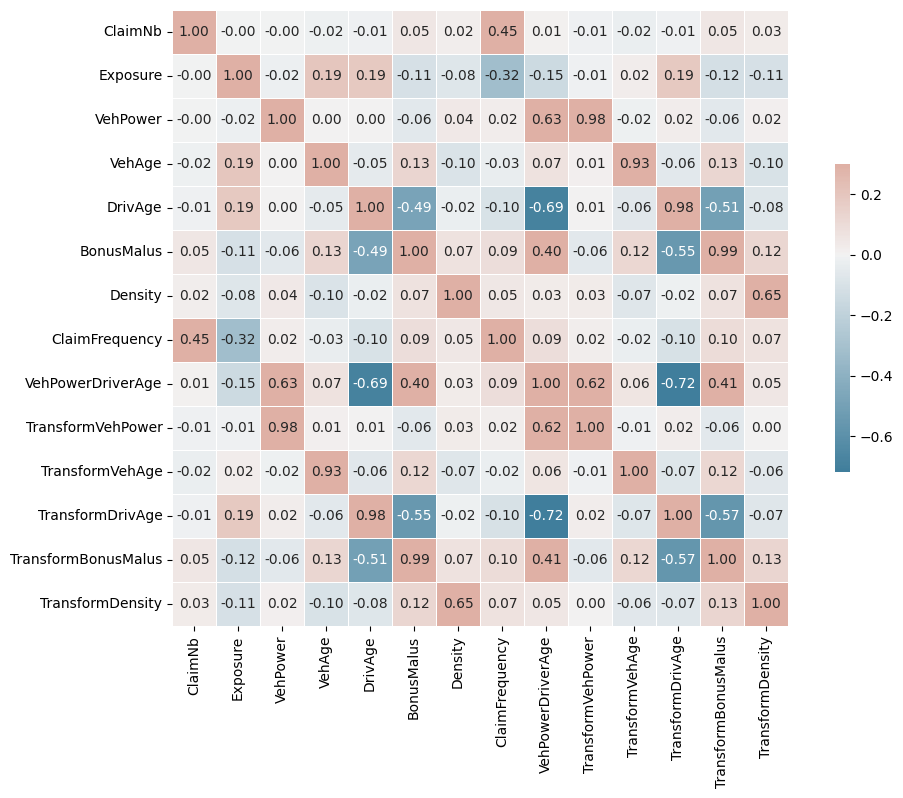

In [81]:
# corelation matrics including new features
display_correlation_matrix(df_fe[df_fe["ClaimFrequency"] > 0])

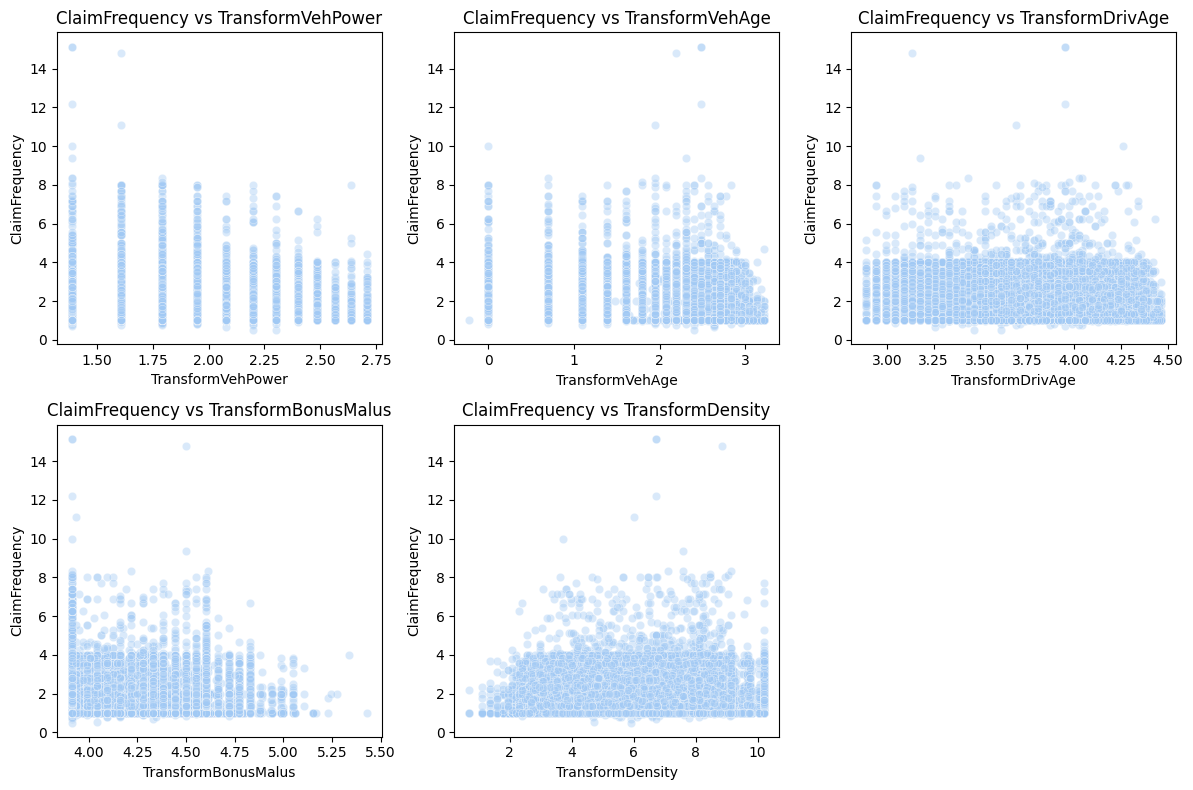

In [82]:
# scatter plots of claim frequency and transformed variables
display_scatterplots(y="ClaimFrequency",data=df_fe[df_fe["ClaimFrequency"] > 0], variables=["TransformVehPower", "TransformVehAge", "TransformDrivAge", "TransformBonusMalus", "TransformDensity"])

The newly created feature, vehicle power divided by driver age, still exhibits a weak linear correlation with claim frequency. However, among all available features, it remains one of the strongest predictors, making it valuable enough to retain as a variable. On the other hand, applying transformations to numerical features did not significantly improve the correlation or dispersion of claim frequency, except in the cases of Bonus/Malus and Density. Since the transformed versions of these two variables show better relationships with claim frequency, I will keep them and remove the original versions to prevent collinearity in the model.

In [83]:
# creating additiona feature and deleting unnecessary
df_fe["isClaim"] = np.where(df_fe["ClaimNb"] > 0, 1, 0)
df_fe.drop(["BonusMalus", "Density", "TransformVehPower", "TransformDrivAge", "TransformVehAge", "ClaimNb", "Exposure"], axis=1, inplace=True)

In [84]:
# saving feature engineering results
df_fe.to_csv("feature_selected_data.csv", index=False)